In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from PIL import Image
np.random.seed(seed=1)

In [2]:
# Parameters
n = 100 # Number of rows
Lambda = 0 # Regularisation parameter
alpha = 1 # Noise variance
sigma = 1 # Theta's variance
col1 = 0.005 # Value of the odd columns for Alternated Columns Variance profile
col2 = 1 # Value of the even columns for Alternated Columns Variance profile

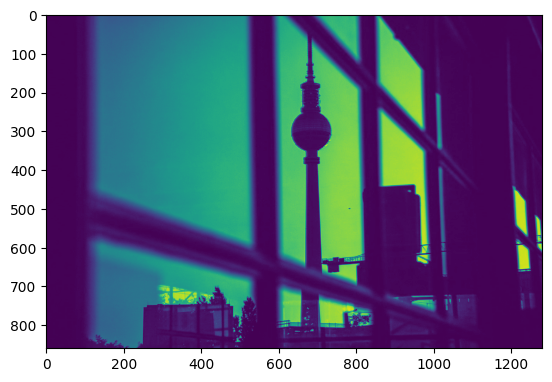

In [8]:
# Berlin photo
img = Image.open('berlin.jpg')
numpydata = np.asarray(img)
Gamma_img = numpydata[:,:,1]
plt.imshow(Gamma_img[:,:])

In [93]:
ratio_dim = np.linspace(0.1,6,80)
ratios_final = [] # List of the ratios n/p 
Equivalent_risk_image = [] # List of deterministic equivalent for various ratios p/n in the case of a Constant Berlin Photo profile
Equivalent_risk_col = [] # List of deterministic equivalent for various ratios p/n in the case of a Alternated Columns Variance profile


Risk_image = [] # List of predictive risk for various ratios p/n in the case of a Berlin Photo Variance profile
Risk_col = [] # List of predictive risk for various ratios p/n in the case of a Alternated Columns Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns

  #Choice of the Variance profile
  img_resized = img.resize((p,n))
  Gamma_image = np.asarray(img_resized)[:,:,1]
  Gamma_image = (Gamma_image/(np.sum(np.abs(Gamma_image))))*p*n # Berlin Photo Variance profile for the training set
  Gamma_col = utils.variance_profile('alternate_column', n, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile for the training set

  Gamma_image_test =  np.array([Gamma_img[n+1,0:p]]) # Berlin Photo Variance profile for the test set
  Gamma_col_test = utils.variance_profile('alternate_column', 1, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile for the test set

  if p != n: # If n=p the predictive risk is not defined, thus we avoid this situation
    ratios_final.append(r)
    risk_image, equivalent_risk_image, _ = utils.R_ts(Lambda, Gamma_image, Gamma_image_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Berlin Photo Variance profile
    risk_col, equivalent_risk_col, _ = utils.R_ts(Lambda, Gamma_col, Gamma_col_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Quasi Alternated Columns Variance profile

    Equivalent_risk_image.append(equivalent_risk_image)
    Equivalent_risk_col.append(equivalent_risk_col)
    
    Risk_image.append(risk_image)
    Risk_col.append(risk_col)

---------- n = 100 - p = 10 - lambda = 0 ----------
---------- n = 100 - p = 10 - lambda = 0 ----------
---------- n = 100 - p = 17 - lambda = 0 ----------
---------- n = 100 - p = 17 - lambda = 0 ----------
---------- n = 100 - p = 24 - lambda = 0 ----------
---------- n = 100 - p = 24 - lambda = 0 ----------
---------- n = 100 - p = 32 - lambda = 0 ----------
---------- n = 100 - p = 32 - lambda = 0 ----------
---------- n = 100 - p = 39 - lambda = 0 ----------
---------- n = 100 - p = 39 - lambda = 0 ----------
---------- n = 100 - p = 47 - lambda = 0 ----------
---------- n = 100 - p = 47 - lambda = 0 ----------
---------- n = 100 - p = 54 - lambda = 0 ----------
---------- n = 100 - p = 54 - lambda = 0 ----------
---------- n = 100 - p = 62 - lambda = 0 ----------
---------- n = 100 - p = 62 - lambda = 0 ----------
---------- n = 100 - p = 69 - lambda = 0 ----------
---------- n = 100 - p = 69 - lambda = 0 ----------
---------- n = 100 - p = 77 - lambda = 0 ----------
---------- n

---------- n = 100 - p = 592 - lambda = 0 ----------
---------- n = 100 - p = 600 - lambda = 0 ----------
---------- n = 100 - p = 600 - lambda = 0 ----------


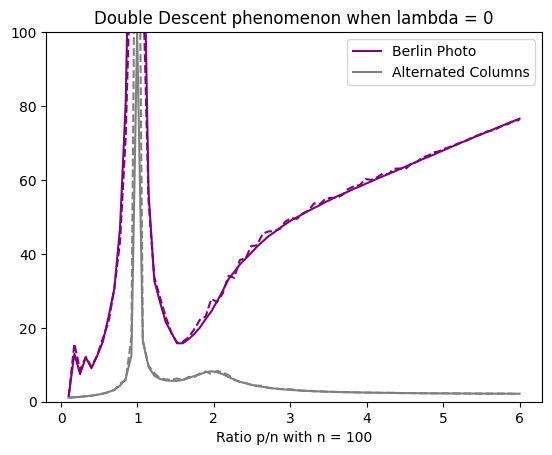

In [95]:
fig, ax = plt.subplots()
ax.plot(ratios_final, Equivalent_risk_image, color = 'purple')
ax.plot(ratios_final, Equivalent_risk_col, color = 'grey')

ax.plot(ratios_final, Risk_image, '--', color = 'purple')
ax.plot(ratios_final, Risk_col, '--', color = 'grey')

plt.legend(["Berlin Photo", "Alternated Columns"])
plt.xlabel("Ratio p/n with n = 100")
plt.title("Double Descent phenomenon when lambda = 0")
plt.ylim(0,100)
plt.show()

In [96]:
n = 300 # Number of rows

ratio_dim = np.linspace(0.1,6,50) # Ratios p/n
eig_image = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Berlin Photo Variance profile
eig_col = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Alternated Columns Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns
  print(p)
  img_resized = img.resize((p,n))
  Gamma_image = np.asarray(img_resized)[:,:,1]
  Gamma_image = (Gamma_image/(np.sum(np.abs(Gamma_image))))*p*n # Berlin Photo Variance profile
  X_image = np.sqrt(Gamma_image) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Berlin Photo Variance profile
  eig_image.append(max(np.real(np.min(np.linalg.eigvals((X_image @ X_image.T)/n))), np.real(np.min(np.linalg.eigvals(X_image.T @ X_image/n)))))
    
  Gamma_col = utils.variance_profile('alternate_column', 1, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile
  X_col = np.sqrt(Gamma_col) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Alternated Columns Variance profile
  eig_col.append(max(np.real(np.min(np.linalg.eigvals((X_col @ X_col.T)/n))), np.real(np.min(np.linalg.eigvals(X_col.T @ X_col/n)))))

30
66
102
138
174
210
246
282
318
355
391
427
463
499
535
571
607
644
680
716
752
788
824
860
896
933
969
1005
1041
1077
1113
1149
1185
1222
1258
1294
1330
1366
1402
1438
1474
1511
1547
1583
1619
1655
1691
1727
1763
1800


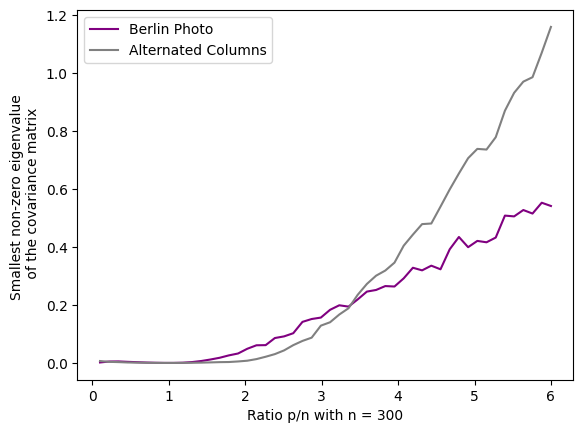

In [98]:
plt.plot(ratio_dim,eig_image, color = 'purple')
plt.plot(ratio_dim,eig_col, color = 'grey')
plt.xlabel("Ratio p/n with n = 300")
plt.ylabel("Smallest non-zero eigenvalue \n of the covariance matrix")
plt.legend(["Berlin Photo", "Alternated Columns"])